## MSOA Centroid and Demographic Data Processing

__Dataset 1__: Shapefile of MSOA Boundary for England <br>
File Name: england_msoa_2021.shp<br>
Download time: 15:35, June 13, 2024<br>
Link: https://borders.ukdataservice.ac.uk/easy_download_data.html?data=England_msoa_2021<br>

__Dataset 2__: Greater London LSOA <br>
File Name: lsoa-data
Download time: 11:25, June 11, 2024<br>
Link: https://data.london.gov.uk/dataset/2011-boundary-files<br>
Note: This file is only for extracting all Greater London Borough Names.


In [3]:
import pandas as pd
import geopandas as gpd


import numpy as np

import matplotlib.pyplot as plt

### Get Greater London Borough List:


In [14]:
lsoa_london = pd.read_csv(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/lsoa-data.csv', encoding='latin1')

/tmp/ipykernel_2628/482587937.py:1: DtypeWarning: Columns (174,175,176,178,189,253,254) have mixed types. Specify dtype option on import or set low_memory=False.
  lsoa_london = pd.read_csv(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/lsoa-data.csv', encoding='latin1')


In [15]:
lsoa_london.head()

,Lower Super Output Area,Names,Mid-year Population Estimates;All Ages;2001,Mid-year Population Estimates;All Ages;2002,Mid-year Population Estimates;All Ages;2003,Mid-year Population Estimates;All Ages;2004,Mid-year Population Estimates;All Ages;2005,Mid-year Population Estimates;All Ages;2006,Mid-year Population Estimates;All Ages;2007,Mid-year Population Estimates;All Ages;2008,...,Road Casualties;2012;Slight,Road Casualties;2012;2012 Total,Road Casualties;2013;Fatal,Road Casualties;2013;Serious,Road Casualties;2013;Slight,Road Casualties;2013;2013 Total,Road Casualties;2014;Fatal,Road Casualties;2014;Serious,Road Casualties;2014;Slight,Road Casualties;2014;2014 Total
0,E01000907,Camden 001A,1519.0,1538.0,1528.0,1547.0,1593.0,1492.0,1455.0,1457.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E01000908,Camden 001B,1547.0,1577.0,1605.0,1637.0,1629.0,1598.0,1605.0,1526.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,E01000909,Camden 001C,1600.0,1598.0,1618.0,1634.0,1610.0,1635.0,1615.0,1584.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,3.0
3,E01000912,Camden 001D,1738.0,1728.0,1678.0,1707.0,1710.0,1669.0,1645.0,1618.0,...,9.0,9.0,0.0,1.0,10.0,11.0,0.0,0.0,7.0,7.0
4,E01000913,Camden 001E,1617.0,1676.0,1662.0,1714.0,1705.0,1690.0,1716.0,1657.0,...,8.0,11.0,0.0,1.0,6.0,7.0,0.0,1.0,13.0,14.0


In [20]:
def keep_first_half_on_last_space(str_input):
    parts = str_input.rsplit(' ', 1)
    if len(parts) == 2:
        return parts[0]
    else:
        return str_input, '' 

In [22]:
keep_first_half_on_last_space("Barking and Dagenham 001A")

'Barking and Dagenham'

In [24]:
# extract lsoa_london column: nams, to a list
lsoa_names = lsoa_london['Names'].tolist()

In [26]:
# in list lsoa_names identify the float values:
# if float value is found, replace it with empty string
lsoa_names = [x if isinstance(x, str) else '' for x in lsoa_names]


In [27]:
lsoa_names

['Camden 001A',
 'Camden 001B',
 'Camden 001C',
 'Camden 001D',
 'Camden 001E',
 'Camden 002A',
 'Camden 002B',
 'Camden 002C',
 'Camden 002D',
 'Camden 002E',
 'Camden 003A',
 'Camden 003B',
 'Camden 003C',
 'Camden 003D',
 'Camden 003E',
 'Camden 004A',
 'Camden 004B',
 'Camden 004C',
 'Camden 004D',
 'Camden 004E',
 'Camden 005A',
 'Camden 005B',
 'Camden 005C',
 'Camden 005D',
 'Camden 005E',
 'Camden 006A',
 'Camden 006B',
 'Camden 006C',
 'Camden 006D',
 'Camden 006E',
 'Camden 007A',
 'Camden 007B',
 'Camden 007C',
 'Camden 007D',
 'Camden 007E',
 'Camden 007F',
 'Camden 008A',
 'Camden 008B',
 'Camden 008C',
 'Camden 008D',
 'Camden 008E',
 'Camden 009A',
 'Camden 009B',
 'Camden 009C',
 'Camden 009D',
 'Camden 009E',
 'Camden 010A',
 'Camden 010B',
 'Camden 010C',
 'Camden 010D',
 'Camden 010E',
 'Camden 011A',
 'Camden 011B',
 'Camden 011C',
 'Camden 011D',
 'Camden 012A',
 'Camden 012B',
 'Camden 012C',
 'Camden 012D',
 'Camden 012E',
 'Camden 013A',
 'Camden 013B',
 'Camden

In [28]:
# for every element in the list, apply the function keep_first_half_on_last_space:
lsoa_names = [keep_first_half_on_last_space(name) for name in lsoa_names]

In [30]:
# keep only unique values:
london_boroughs = list(set(lsoa_names))

In [35]:
len(london_boroughs)

33

In [34]:
# drop "('', '')" in the list
london_boroughs = [x for x in london_boroughs if x != ('', '')]

In [36]:
london_boroughs

['Kingston upon Thames',
 'Wandsworth',
 'Redbridge',
 'Southwark',
 'Enfield',
 'Kensington and Chelsea',
 'Sutton',
 'Lewisham',
 'City of London',
 'Brent',
 'Barking and Dagenham',
 'Havering',
 'Bromley',
 'Waltham Forest',
 'Harrow',
 'Tower Hamlets',
 'Islington',
 'Richmond upon Thames',
 'Hounslow',
 'Hillingdon',
 'Hammersmith and Fulham',
 'Ealing',
 'Westminster',
 'Hackney',
 'Lambeth',
 'Newham',
 'Greenwich',
 'Barnet',
 'Merton',
 'Bexley',
 'Camden',
 'Croydon',
 'Haringey']

In [37]:
# save this to a csv:
london_boroughs_df = pd.DataFrame(london_boroughs, columns=['Boroughs'])
london_boroughs_df.to_csv(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/london_boroughs.csv', index=False)

### Read in MSOA shapefile:

In [11]:
# read the geojson at this path: r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/msoaMSOA11_WD20_LAD20_EW_LU_v2_fe9d3f4903fe4ae1b1141625ae912e60_5494812726204408107.geojson'
gdf = gpd.read_file(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/msoa/england_msoa_2021.shp')


In [12]:
gdf.head()

,hclnm,hclnmw,label,msoa21cd,msoa21nm,name,geometry
0,Shirley West,None,E92000001E12000005E08000029E02006808,E02006808,Solihull 030,Solihull 030,"POLYGON ((411558.813 280000.000, 411564.979 27..."
1,Royston North & Central,None,E92000001E12000006E07000099E02004909,E02004909,North Hertfordshire 001,North Hertfordshire 001,"POLYGON ((536232.639 242253.637, 536293.625 24..."
2,Nettleswell,None,E92000001E12000006E07000073E02004546,E02004546,Harlow 003,Harlow 003,"POLYGON ((545339.813 211500.031, 545351.875 21..."
3,Plumstead High Street,None,E92000001E12000007E09000011E02000318,E02000318,Greenwich 006,Greenwich 006,"POLYGON ((546024.231 178810.367, 546024.002 17..."
4,Fulham Broadway,None,E92000001E12000007E09000013E02000388,E02000388,Hammersmith and Fulham 017,Hammersmith and Fulham 017,"POLYGON ((525600.834 177749.054, 525605.642 17..."


In [9]:
# show unique values of column geometry
gdf['geometry'].unique()

<GeometryArray>
[]
Length: 0, dtype: geometry

In [38]:
# for every row in the column msoa21nm, apply the function keep_first_half_on_last_space, and save the result to a new column called 'Boroughs':
gdf['Boroughs'] = gdf['msoa21nm'].apply(keep_first_half_on_last_space)

In [39]:
# keep only london boroughs:
gdf = gdf[gdf['Boroughs'].isin(london_boroughs)]

In [40]:
gdf.head()

,hclnm,hclnmw,label,msoa21cd,msoa21nm,name,geometry,Boroughs
3,Plumstead High Street,None,E92000001E12000007E09000011E02000318,E02000318,Greenwich 006,Greenwich 006,"POLYGON ((546024.231 178810.367, 546024.002 17...",Greenwich
4,Fulham Broadway,None,E92000001E12000007E09000013E02000388,E02000388,Hammersmith and Fulham 017,Hammersmith and Fulham 017,"POLYGON ((525600.834 177749.054, 525605.642 17...",Hammersmith and Fulham
13,Streatham Vale,None,E92000001E12000007E09000022E02000652,E02000652,Lambeth 035,Lambeth 035,"POLYGON ((529736.206 170431.382, 529736.499 17...",Lambeth
15,Queen's Park Gardens,None,E92000001E12000007E09000033E02000963,E02000963,Westminster 004,Westminster 004,"POLYGON ((524291.499 182989.539, 524295.596 18...",Westminster
20,Streatham Common,None,E92000001E12000007E09000022E02000651,E02000651,Lambeth 034,Lambeth 034,"POLYGON ((531297.728 171022.395, 531284.488 17...",Lambeth


Convert the CRS and find centroids

In [41]:
gdf = gdf.to_crs(epsg=4326)

In [42]:
# Calculate centroids
gdf['centroid'] = gdf.geometry.centroid

# Extract the lat and long of the centroids
gdf['lat'] = gdf.centroid.y
gdf['lon'] = gdf.centroid.x

/tmp/ipykernel_2628/3775903783.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
/tmp/ipykernel_2628/3775903783.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y
/tmp/ipykernel_2628/3775903783.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x


In [44]:
# now plot the london lsoas centroids on a map with folium:
import folium

# Create a map centered on London
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)


# Add centroid points to the map, make them red:
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], icon=folium.Icon(color='red')).add_to(m)

# save the map as an html file
m.save(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/maps/msoa_london.html')

In [45]:
gdf.head()

,hclnm,hclnmw,label,msoa21cd,msoa21nm,name,geometry,Boroughs,centroid,lat,lon
3,Plumstead High Street,None,E92000001E12000007E09000011E02000318,E02000318,Greenwich 006,Greenwich 006,"POLYGON ((0.10187 51.48939, 0.10187 51.48938, ...",Greenwich,POINT (0.09562 51.48827),51.488265,0.095618
4,Fulham Broadway,None,E92000001E12000007E09000013E02000388,E02000388,Hammersmith and Fulham 017,Hammersmith and Fulham 017,"POLYGON ((-0.19250 51.48476, -0.19244 51.48469...",Hammersmith and Fulham,POINT (-0.19845 51.48316),51.483157,-0.198445
13,Streatham Vale,None,E92000001E12000007E09000022E02000652,E02000652,Lambeth 035,Lambeth 035,"POLYGON ((-0.13566 51.41806, -0.13566 51.41806...",Lambeth,POINT (-0.13805 51.41504),51.415041,-0.138046
15,Queen's Park Gardens,None,E92000001E12000007E09000033E02000963,E02000963,Westminster 004,Westminster 004,"POLYGON ((-0.20950 51.53214, -0.20945 51.53214...",Westminster,POINT (-0.20937 51.52908),51.529079,-0.209371
20,Streatham Common,None,E92000001E12000007E09000022E02000651,E02000651,Lambeth 034,Lambeth 034,"POLYGON ((-0.11300 51.42301, -0.11319 51.42286...",Lambeth,POINT (-0.12594 51.41915),51.419153,-0.125942


In [46]:
# save code, name, latitude and longitude to a new dataframe
msoa_london_df = gdf[['hclnm', 'hclnmw', 'label', 'msoa21cd', 'msoa21nm', 'name','Boroughs', 'centroid', 'lat', 'lon']]

# save to csv
msoa_london_df.to_csv(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/msoa/processed/gld_msoa_centroids.csv', index=False)

In [47]:
# in gdf find number of unique values in column 'mssoa21cd'
len(gdf['msoa21cd'].unique())

1002

in 2021 survey, there are in total 1002 MSOAs in Greater London.

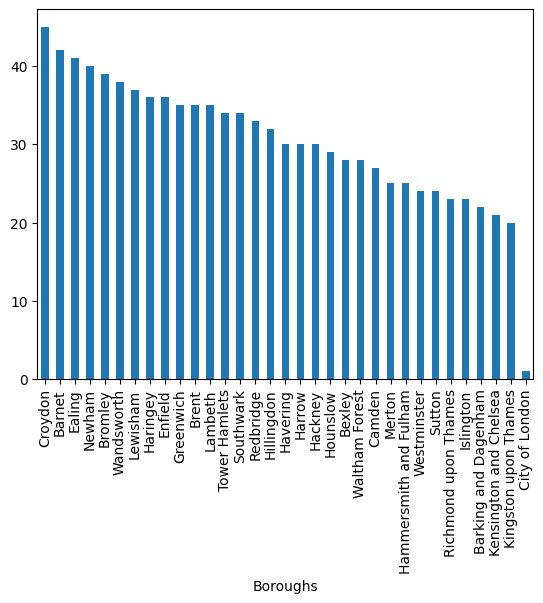

In [49]:
# for each unique value in 'Boroughs' column, find the number of occurance in the column, plot a histogram:
gdf['Boroughs'].value_counts().plot(kind='bar')

# save the plot as a png file
plt.savefig(r'/mnt/d/University College London/Chen, Huanfa - Dissertation_Mengyu_Ding/Data/plots/msoa_london_boroughs.png')
